<a href="https://colab.research.google.com/github/julioclerio/adaboost/blob/main/notebook/ada_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# fazer um gridsearch para melhorar os dados
# fazer um adaboost para regressão

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/german_credit_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200} 0.71

Métricas de avaliação de treino:
[[ 65 176]
 [ 24 535]]


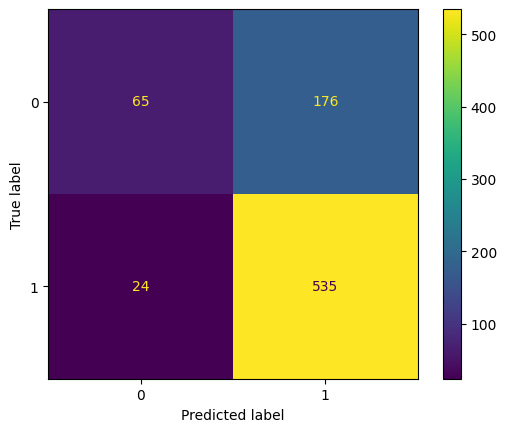

              precision    recall  f1-score   support

           0       0.73      0.27      0.39       241
           1       0.75      0.96      0.84       559

    accuracy                           0.75       800
   macro avg       0.74      0.61      0.62       800
weighted avg       0.75      0.75      0.71       800


Métricas de avaliação de teste:
[[  9  50]
 [  8 133]]


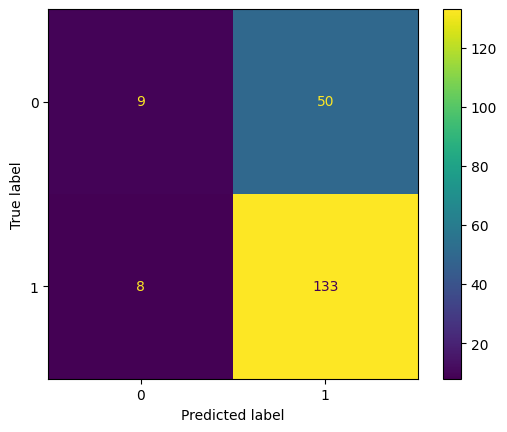

              precision    recall  f1-score   support

           0       0.53      0.15      0.24        59
           1       0.73      0.94      0.82       141

    accuracy                           0.71       200
   macro avg       0.63      0.55      0.53       200
weighted avg       0.67      0.71      0.65       200



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Preprocess the dataset

# Separate the features and the target variable
X = data.drop(['Risk', 'Unnamed: 0'], axis=1)
y = data['Risk'].apply(lambda x: 1 if x == 'good' else 0)  # Convert the target variable to binary

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Create the preprocessing pipelines for both numerical and categorical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values with mean
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical data to one-hot vectors
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Create the AdaBoostClassifier pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', AdaBoostClassifier(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the grid of parameters to search
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_parameters = grid_search.best_params_

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and accuracy
print(best_parameters, accuracy)

# ============================================

print("\nMétricas de avaliação de treino:")
y_pred_train = grid_search.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")
y_pred_test = grid_search.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# For regression, we'll predict 'Credit amount'. We'll drop it from the features and use it as the target.
X_reg = data.drop(['Credit amount', 'Unnamed: 0'], axis=1)
y_reg = data['Credit amount']

# Re-define categorical and numerical features without the 'Credit amount'
categorical_features_reg = X_reg.select_dtypes(include=['object']).columns.tolist()
numerical_features_reg = X_reg.select_dtypes(exclude=['object']).columns.tolist()

# Combine preprocessing steps for regression
preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features_reg),
        ('cat', categorical_pipeline, categorical_features_reg)
    ]
)

# Create the AdaBoostRegressor pipeline
pipeline_reg = Pipeline(steps=[('preprocessor', preprocessor_reg),
                               ('regressor', AdaBoostRegressor(random_state=42))])

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Define the grid of parameters to search for regression
param_grid_reg = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 1],
    'regressor__loss': ['linear', 'square', 'exponential']
}

# Create the grid search object for regression
grid_search_reg = GridSearchCV(pipeline_reg,
                               param_grid_reg,
                               cv=5,
                               verbose=1,
                               n_jobs=-1)


grid_search_reg.fit(X_train_reg, y_train_reg)

# Best parameters from grid search
best_parameters_reg = grid_search_reg.best_params_

# Predict on the test set

y_pred_reg = grid_search_reg.predict(X_test_reg)

# Calculate regression metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

# Print best parameters and regression metrics
print(f'Best parameters: {best_parameters_reg}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'regressor__learning_rate': 0.1, 'regressor__loss': 'exponential', 'regressor__n_estimators': 50}
MSE: 3978140.8628319115
MAE: 1466.0067807968505
R-squared: 0.3461305008626616
